In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
europe_or_nearby = ['Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands',
       'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'United Kingdom']

In [95]:
distance = pd.read_csv('data/controls/distance.csv', index_col=0)
subsidies = pd.read_csv('data/controls/energy_subsidies.csv', index_col=0)
urss = pd.read_csv('data/controls/ex_urss_influenced.csv', index_col=0)
gdppc = pd.read_csv('data/controls/GDPperCap.csv', index_col=0)
unemployment = pd.read_csv('data/controls/unemployment.csv', index_col=0)

In [96]:
# keep change in subsidies from 2021 to 2022
subsidies['increase'] = subsidies['2022'] - subsidies['2021']
subsidies = subsidies[['increase']].rename(columns={'increase': 'energy_subsidies_increase'})

In [97]:
# will talke 2022 (not the change), to account for country economic disparities

# keep only countries in Europe or nearby for gdppc
gdppc = gdppc.loc[gdppc.index.isin(europe_or_nearby)]
gdppc = gdppc[['2022']].rename(columns={'2022': 'gdppc'})

In [98]:
unemployment = unemployment.loc[unemployment.index.isin(europe_or_nearby)]
unemployment['increase'] = unemployment['2022'] - unemployment['2021']
unemployment = unemployment[['2022']].rename(columns={'2022': 'unemployment_increase'})

In [99]:
bartik = pd.read_csv('data/FINAL_BARTIK.csv', index_col=0)

In [100]:
approvals = pd.read_csv('../Design/data/Approvals_cleaned.csv')
approvals.drop(columns=['Sweden', 'Italy'], inplace=True)

def compute_approval_change(start_date, end_date):
    df = approvals.copy()
    df['Date'] = pd.to_datetime(df['Date'])  # ensure datetime format

    # Convert wide to long format
    df_long = df.melt(id_vars='Date', var_name='country', value_name='approval')

    # Filter date range
    df_long = df_long[(df_long['Date'] >= start_date) & (df_long['Date'] <= end_date)]

    # Calculate change from start to end per country
    start_approvals = df_long[df_long['Date'] == pd.to_datetime(start_date)]
    end_approvals = df_long[df_long['Date'] == pd.to_datetime(end_date)]

    merged = pd.merge(start_approvals, end_approvals, on='country', suffixes=('_start', '_end'))
    merged['approval_change'] = merged['approval_end'] - merged['approval_start']

    return merged[['country', 'approval_change']]

approval_change = compute_approval_change('2022-06-01', '2022-12-01').dropna()

In [101]:
approval_change.index = approval_change['country']
approval_change = approval_change[['approval_change']]

### Merge all together

In [102]:
# merge all controls into one DataFrame
dataset = distance.join(subsidies).join(gdppc).join(unemployment).join(bartik).join(approval_change) # . join(urss)

In [103]:
dataset.dropna(inplace=True)

In [104]:
# normalize the controls exept for the approval change and ex_urss_influenced
for col in dataset.columns:
    if col not in ['approval_change']:
        dataset[col] = (dataset[col] - dataset[col].mean()) / dataset[col].std()

dataset

,distance_to_kyiv_km,energy_subsidies_increase,gdppc,unemployment_increase,bartik_iv,approval_change
country,,,,,,
Austria,-0.723659,-0.341913,0.146928,-0.156204,-0.408905,-3.0
Belgium,0.427343,-0.688853,0.105088,0.060580,-0.083559,-5.0
Bulgaria,-0.773786,1.277144,-1.030335,-0.427747,0.632631,-8.0
Croatia,-0.519050,0.005028,-0.883014,0.581913,-0.125074,1.0
Czechia,-0.593214,-0.804500,-0.583107,-1.194370,1.326173,-6.0
Denmark,-0.320450,-0.688853,0.633161,-0.365488,-0.852492,-3.0
Estonia,-0.710322,-0.226266,-0.577946,0.060955,1.461019,-2.0
Finland,-0.604646,-0.688853,0.093822,0.491524,-0.694479,0.0
France,0.702745,0.351969,-0.192017,0.712434,-0.927250,-6.0


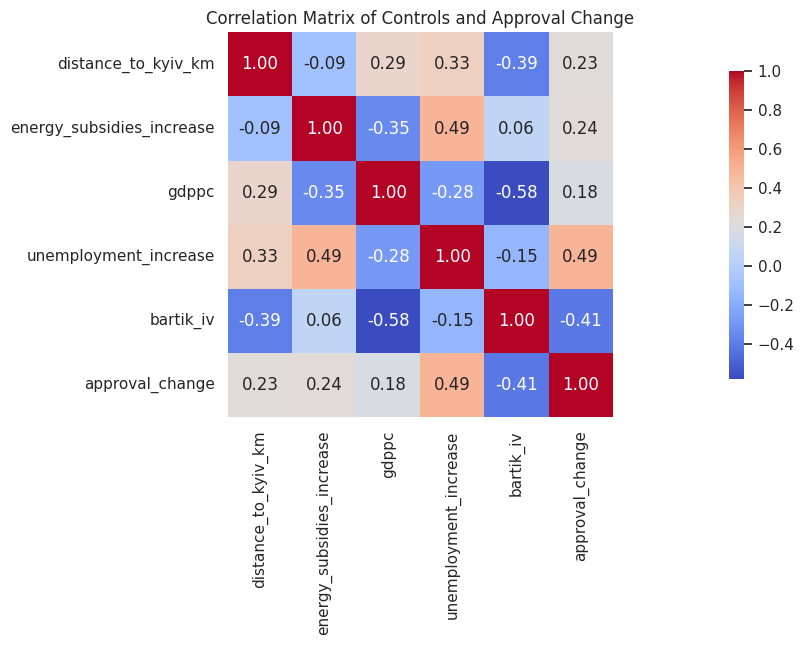

In [105]:
# plot  correlation matrix
plt.figure(figsize=(30, 5))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Controls and Approval Change')
plt.show()

### While GDP per capita and proximity to Ukraine are mechanically correlated with countries' exposure to global commodity shocks — and thus with the Bartik IV — these variables show only weak correlations with leader approval changes. This suggests that they are unlikely to represent substantial omitted channels linking the instrument to the outcome, supporting the credibility of the exclusion restriction.

In [106]:
# regress approval_change on  data using ridge regression
from sklearn.linear_model import Lasso
X = dataset[['distance_to_kyiv_km','energy_subsidies_increase','gdppc','unemployment_increase','bartik_iv']]
y = dataset['approval_change']
ridge = Lasso(alpha=1.0)
ridge.fit(X, y)
# print summary
print("Lasso Regression Coefficients:")
for feature, coef in zip(X.columns, ridge.coef_):
    print(f"{feature}: {coef:.4f}")

Lasso Regression Coefficients:
distance_to_kyiv_km: 0.0000
energy_subsidies_increase: 0.0000
gdppc: 0.0000
unemployment_increase: 1.0543
bartik_iv: -0.6552


In [107]:
dataset.head(2)

,distance_to_kyiv_km,energy_subsidies_increase,gdppc,unemployment_increase,bartik_iv,approval_change
country,,,,,,
Austria,-0.723659,-0.341913,0.146928,-0.156204,-0.408905,-3.0
Belgium,0.427343,-0.688853,0.105088,0.060580,-0.083559,-5.0


In [108]:
# regress approval_change on pca_controls and bartik
import statsmodels.api as sm
X = dataset[['unemployment_increase', 'bartik_iv']]
X = sm.add_constant(X)  # add constant term for intercept
model = sm.OLS(dataset['approval_change'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        approval_change   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     5.562
Date:                Fri, 30 May 2025   Prob (F-statistic):             0.0120
Time:                        16:26:06   Log-Likelihood:                -61.609
No. Observations:                  23   AIC:                             129.2
Df Residuals:                      20   BIC:                             132.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -3.13

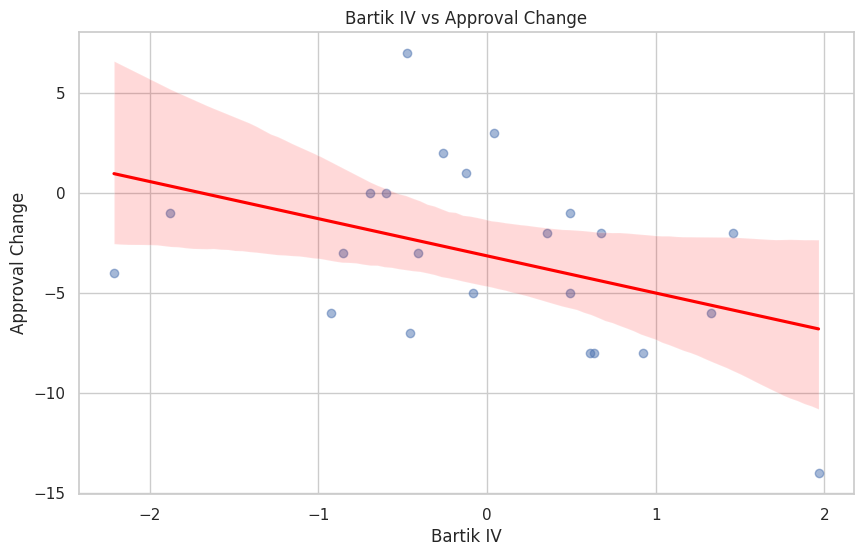

In [109]:
# plot bartik vs approval change with regression line
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.regplot(x='bartik_iv', y='approval_change', data=dataset, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Bartik IV vs Approval Change')
plt.xlabel('Bartik IV')
plt.ylabel('Approval Change')

plt.show()

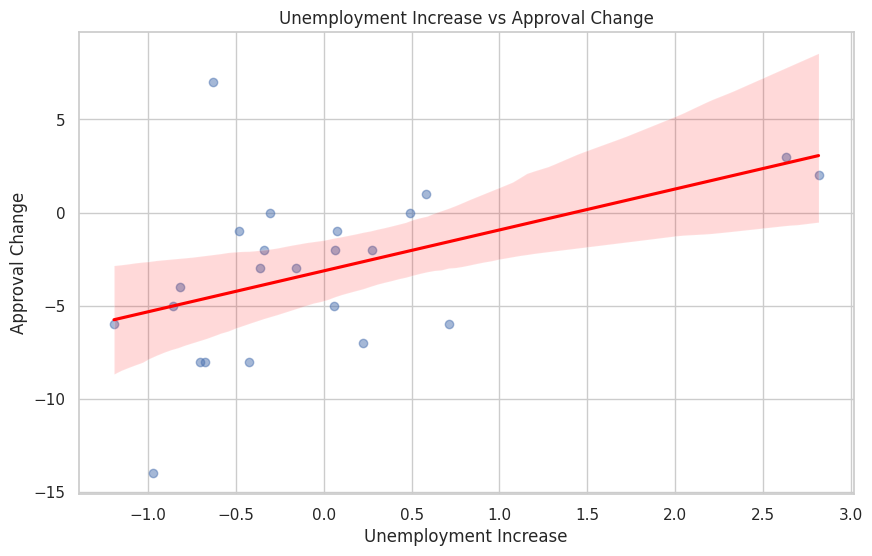

In [110]:
# plot approval change vs unemployment increase with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='unemployment_increase', y='approval_change', data=dataset, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Unemployment Increase vs Approval Change')
plt.xlabel('Unemployment Increase')
plt.ylabel('Approval Change')
plt.show()